### Introduction

In [7]:
# import data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [8]:
## import dataset
online_retail = pd.read_csv("Online Retail.csv")

In [9]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
online_retail.shape

(541909, 8)

In [12]:
online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
# seperate negative quantity
online_retail = online_retail[(online_retail["Quantity"] > 0)]
online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [17]:
# seperate negative price
online_retail = online_retail[online_retail["UnitPrice"] > 0]
online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [21]:
invalid_stockcodes = ["POST", "DOT", "BANK CHARGES", "AMAZON FEES", "B",
                      "gift_0001_10", "gift_0001_20", "gift_0001_30", 
                      "gift_0001_40", "gift_0001_50"]


# remove rows where Stockcode is in the invalid list
online_retail= online_retail[~online_retail["StockCode"].isin(invalid_stockcodes)]
online_retail


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [67]:
# Renaming the Description to Products
online_retail=online_retail.rename(columns={"Description": "Product"})
online_retail.head()


,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010.0,4.0,December,Morning,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010.0,4.0,December,Morning,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.0,2010.0,4.0,December,Morning,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010.0,4.0,December,Morning,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010.0,4.0,December,Morning,Wednesday


In [143]:
online_retail.isna().sum()

InvoiceNo        1
StockCode        1
Product          1
Quantity         1
InvoiceDate      1
UnitPrice        1
CustomerID       0
Country          0
TotalSales       1
Year             1
Quarter          1
Month            1
Period           0
Days_of_Week     1
Recency          0
Frequency        0
MonetaryValue    0
dtype: int64

In [149]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523003 entries, 0 to 523002
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      523002 non-null  object        
 1   StockCode      523002 non-null  object        
 2   Product        523002 non-null  object        
 3   Quantity       523002 non-null  object        
 4   InvoiceDate    523002 non-null  datetime64[ns]
 5   UnitPrice      523002 non-null  object        
 6   CustomerID     523003 non-null  int32         
 7   Country        523003 non-null  int64         
 8   TotalSales     523002 non-null  float64       
 9   Year           523002 non-null  float64       
 10  Quarter        523002 non-null  float64       
 11  Month          523002 non-null  category      
 12  Period         523003 non-null  int64         
 13  Days_of_Week   523002 non-null  category      
 14  Recency        523003 non-null  float64       
 15  

In [95]:
#filling missing values
online_retail["CustomerID"] =online_retail["CustomerID"].ffill()
# convert CustomerID to Integer
online_retail["CustomerID"] = online_retail["CustomerID"].astype(int)
#Infer objects types
online_retail = online_retail.infer_objects()


In [83]:
# convert the invoice date column to a datetime format
online_retail= online_retail.copy()
online_retail["InvoiceDate"]=pd.to_datetime(online_retail["InvoiceDate"],format="%m/%d/%y %H:%M")


In [11]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Product      540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [31]:
# checking Duplicates 
online_retail.duplicated().sum()

5226

In [45]:
#dropping duplicates
online_retail.drop_duplicates(inplace=True)

In [51]:
#value counts for customerid
online_retail["CustomerID"].value_counts()

CustomerID
17841.0    7676
14911.0    5670
14096.0    5095
12748.0    4411
14606.0    2675
           ... 
18068.0       1
15389.0       1
17747.0       1
13302.0       1
13099.0       1
Name: count, Length: 4337, dtype: int64

# FEATURE ENGINEERING

## Total Sales

In [53]:
#total sales
online_retail["TotalSales"]= online_retail["Quantity"] * online_retail["UnitPrice"]

## Year

In [55]:
# extract Year from Invoicedate
online_retail["Year"]= online_retail["InvoiceDate"].dt.year
# group by year and sum sales
yearly_trends = online_retail.groupby("Year")["TotalSales"].sum().reset_index()
yearly_trends

,Year,TotalSales
0,2010.0,792259.95
1,2011.0,9553587.333003


## Quarter

In [57]:
#Extract quarter from InvoiceDate 
online_retail["Quarter"]= online_retail["InvoiceDate"].dt.quarter
#Group by quarter and sum of sales
quarter_trends = online_retail.groupby("Quarter")["TotalSales"].sum().reset_index()
quarter_trends = quarter_trends.sort_values(by = "Quarter")
quarter_trends

,Quarter,TotalSales
0,1.0,1878969.11
1,2.0,2014563.581
2,3.0,2463111.252
3,4.0,3989203.34


## Month

In [131]:
#Extract Month Name
online_retail["Month"] = online_retail["InvoiceDate"].dt.strftime('%B') #strftime(string Format Time), %B(Python Magic Code to format date to Month).

#Define the correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]
# Ensure 'Month' is a categorical variable with the correct order
online_retail["Month"] = pd.Categorical(online_retail["Month"], categories=month_order, ordered=True)
#Group by Month and sum of sales
monthly_trends = online_retail.groupby("Month", observed=True)["TotalSales"].sum().reset_index()
monthly_trends = monthly_trends.sort_values(by = "Month")
monthly_trends

,Month,TotalSales
0,January,670677.140
1,February,509252.320
2,March,699039.650
3,April,525916.491
4,May,745610.230
5,June,743036.860
6,July,699877.141
7,August,727928.540
8,September,1035305.571
9,October,1125235.970


## Period of the Day

In [61]:
# Define a function to categorize periods of the day
def get_period(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    elif hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to extract periods
online_retail['Period'] = online_retail['InvoiceDate'].dt.hour.apply(get_period)


# Define the correct order of periods
period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Ensure 'Period' is a categorical variable with the correct order
online_retail['Period'] = pd.Categorical(online_retail['Period'], categories=period_order, ordered=True)

# Calculate total sales per period
period_trends = online_retail.groupby('Period', observed=True)['TotalSales'].sum().reset_index()
period_trends = period_trends.sort_values(by='Period')
period_trends

,Period,TotalSales
0,Morning,3893750.012
1,Afternoon,5802178.001
2,Evening,631086.79
3,Night,18832.48


## Days of the Week

In [129]:
#Extract the Days Of the Week
online_retail['Days_of_Week'] = online_retail['InvoiceDate'].dt.day_name()

# Define correct order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Days_of_Week' to categorical with correct order
online_retail['Days_of_Week'] = pd.Categorical(online_retail['Days_of_Week'], categories=days_order, ordered=True)

days_of_week_trends = online_retail.groupby('Days_of_Week', observed=True)['TotalSales'].sum().reset_index()
days_of_week_trends = days_of_week_trends.sort_values(by = "Days_of_Week")
days_of_week_trends

,Days_of_Week,TotalSales
0,Monday,1716922.560
1,Tuesday,2111584.921
2,Wednesday,1792519.730
3,Thursday,2149605.940
4,Friday,1776195.011
5,Sunday,799019.121


## Top selling Products

In [69]:
#Top Selling Products

top_selling = online_retail.groupby('Product')[['Quantity','TotalSales']].sum()
top_selling.head(10)

top_selling = top_selling.sort_values(by='TotalSales',ascending = False)
top_selling.head(10)

,Quantity,TotalSales
Product,,
REGENCY CAKESTAND 3 TIER,13851,174156.54
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.6
WHITE HANGING HEART T-LIGHT HOLDER,37872,106236.72
PARTY BUNTING,18283,99445.23
JUMBO BAG RED RETROSPOT,48371,94159.81
MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
Manual,6985,77752.82
RABBIT NIGHT LIGHT,30739,66870.03
PAPER CHAIN KIT 50'S CHRISTMAS,19329,64875.59


# VISUALIZATION 

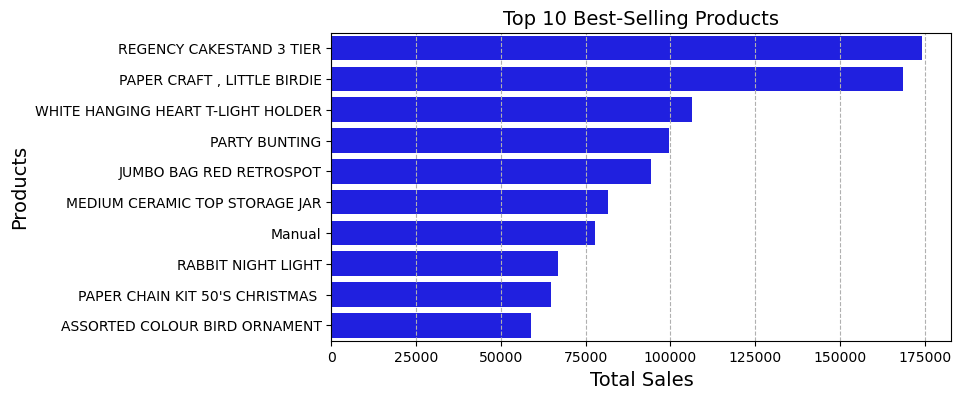

In [71]:
# set figure size
plt.figure(figsize=(8, 4))

# Create barplot
sns.barplot(x="TotalSales", y="Product", data=top_selling.head(10), color="blue")

# Labelling the Visual
plt.xlabel("Total Sales",fontsize = 14)
plt.ylabel("Products",fontsize = 14)
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()

# PURCHASE TRENDS

## Monthy Purchase Trends

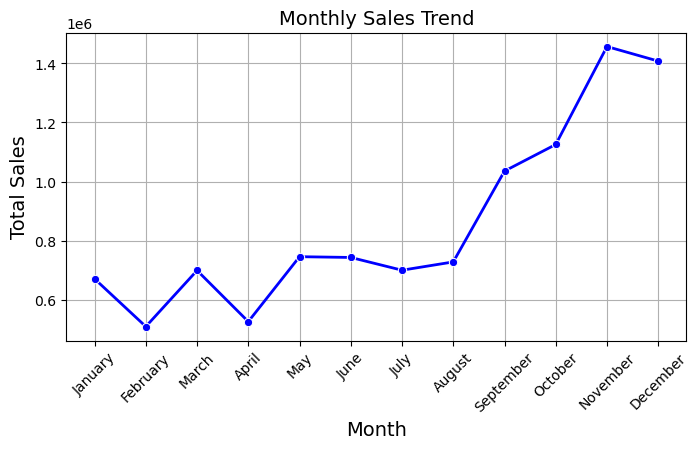

In [73]:
#Create the plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_trends, x='Month', y='TotalSales', marker='o', linewidth=2, color='blue')

# Customize the chart
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

## Quarter Trends

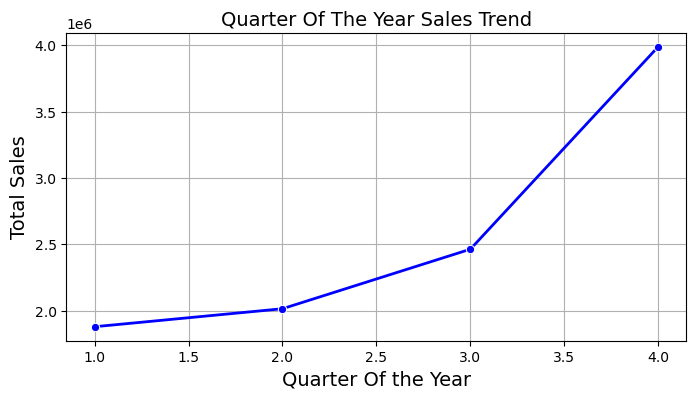

In [75]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=quarter_trends, x='Quarter', y='TotalSales', marker='o', linewidth=2, color='blue')

# Customize the chart
plt.title('Quarter Of The Year Sales Trend', fontsize=14)
plt.xlabel('Quarter Of the Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

## Period of the day Purchase Trends

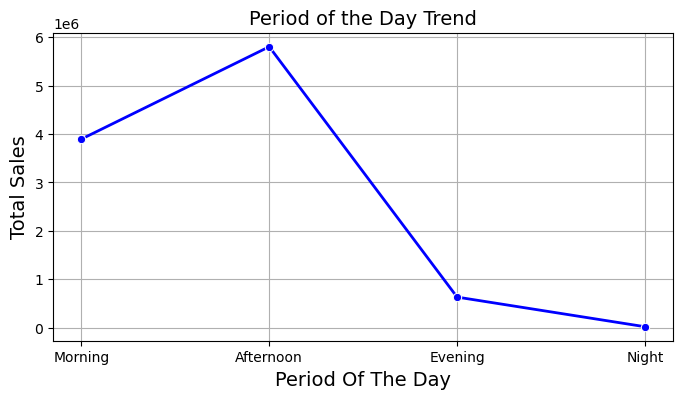

In [77]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=period_trends, x="Period",y="TotalSales",marker="o",linewidth=2, color= "blue")

# Customize the chart
plt.title('Period of the Day Trend', fontsize=14)
plt.xlabel('Period Of The Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

## Daily Purchase Trends

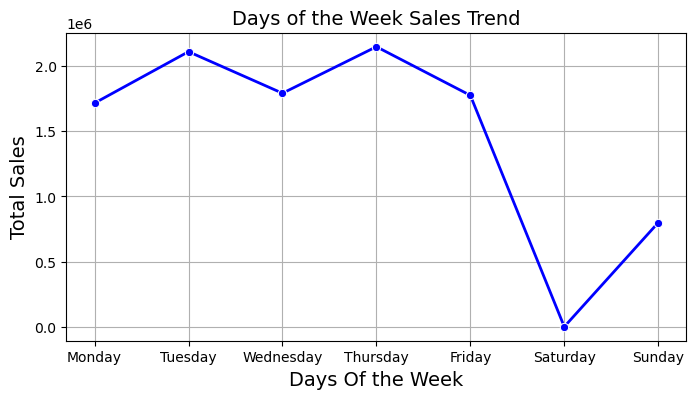

In [79]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=days_of_week_trends, x='Days_of_Week', y='TotalSales', marker='o', linewidth=2, color='blue')

# Customize the chart
plt.title('Days of the Week Sales Trend', fontsize=14)
plt.xlabel('Days Of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

# CLUSTERING CUSTOMER SEGMENTATION

## Recency

In [97]:
#Setting the reference date to the end date of the analysis
reference_date = online_retail["InvoiceDate"].max()

#Grouping data by customer and getting the latest purchase date for each customer
grouped = online_retail.groupby("CustomerID")["InvoiceDate"].max().reset_index()

#Calculating the recency for each customer by subtracting the most recent purchase date from the reference date
grouped["Recency"] = (reference_date - grouped["InvoiceDate"]).dt.days

#Merging the recency value to the dataframe
online_retail = online_retail.merge(grouped[["CustomerID", "Recency"]], on = "CustomerID", how = "left")







In [99]:
print(online_retail.dtypes)

InvoiceNo               object
StockCode               object
Product                 object
Quantity                object
InvoiceDate     datetime64[ns]
UnitPrice               object
CustomerID               int32
Country                 object
TotalSales             float64
Year                   float64
Quarter                float64
Month                 category
Period                category
Days_of_Week          category
Recency                  int64
dtype: object


In [57]:
online_retail

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,TotalSales,Month,Quarter,Days_of_Week,Period,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30,December,4,Wednesday,Morning,301.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,December,4,Wednesday,Morning,301.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,22.00,December,4,Wednesday,Morning,301.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,December,4,Wednesday,Morning,301.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,December,4,Wednesday,Morning,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,10.20,December,4,Friday,Afternoon,0.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60,December,4,Friday,Afternoon,0.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60,December,4,Friday,Afternoon,0.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60,December,4,Friday,Afternoon,0.0


## Frequency

In [101]:
#Calculating the frequency for each customer by counting the number of purchases
frequency = online_retail.groupby("CustomerID")["InvoiceNo"].count()

#Merging the frequency value to the dataframe
online_retail = online_retail.merge(frequency, on = "CustomerID", how = "left")
online_retail.rename(columns={"InvoiceNo_x" : "InvoiceNo", "InvoiceNo_y" : "Frequency"}, inplace = True)
online_retail

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010.0,4.0,December,Morning,Wednesday,371,297
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010.0,4.0,December,Morning,Wednesday,371,297
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010.0,4.0,December,Morning,Wednesday,371,297
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010.0,4.0,December,Morning,Wednesday,371,297
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010.0,4.0,December,Morning,Wednesday,371,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522998,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.60,2011.0,4.0,December,Afternoon,Friday,0,49
522999,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011.0,4.0,December,Afternoon,Friday,0,49
523000,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011.0,4.0,December,Afternoon,Friday,0,49
523001,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011.0,4.0,December,Afternoon,Friday,0,49


## MONETARY VALUE

In [103]:
# Step 1: Compute Monetary value per customer (sum of TotalSales)
monetary_value = online_retail.groupby("CustomerID")["TotalSales"].sum().reset_index()

# Step 2: Merge the monetary value with the main dataframe
online_retail = online_retail.merge(monetary_value, on = "CustomerID", how = "left")

# Rename the column for clarity
online_retail.rename(columns={"TotalSales_x" : "TotalSales", "TotalSales_y" : "MonetaryValue"}, inplace = True)

In [105]:
# Ensure unique customers before clustering
clustering_features = online_retail.groupby("CustomerID").agg({
    "Recency": "min",          # Most recent purchase (smaller is better)
    "Frequency": "max",        # Total number of transactions
    "MonetaryValue" : "max"
}).reset_index()

clustering_features




,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,201,2790.16
3,12349,18,72,1457.55
4,12350,309,16,294.40
...,...,...,...,...
4332,18280,277,321,7679.65
4333,18281,180,7,80.82
4334,18282,7,12,178.05
4335,18283,3,721,2045.53


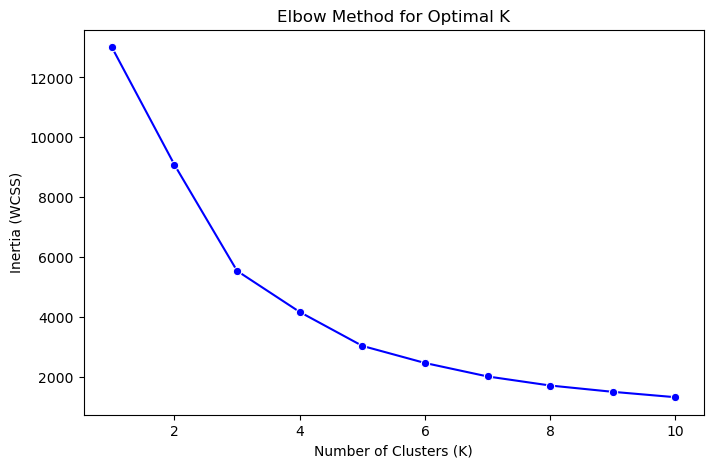

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features[["Recency", "Frequency", "MonetaryValue"]])

# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=K_range, y=inertia, marker="o", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [171]:
# Apply K-Means clustering with K=4
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
clustering_features.loc[:, "CustomerSegment"] = kmeans.fit_predict(clustering_features_scaled)

# Display the first few rows with assigned clusters
clustering_features

,CustomerID,Recency,Frequency,MonetaryValue,CustomerSegment
0,12346,325,1,77183.60,0
1,12347,1,182,4310.00,1
2,12348,74,201,2790.16,1
3,12349,18,72,1457.55,1
4,12350,309,16,294.40,0
...,...,...,...,...,...
4332,18280,277,321,7679.65,0
4333,18281,180,7,80.82,0
4334,18282,7,12,178.05,1
4335,18283,3,721,2045.53,1


In [173]:
# Merge CustomerSegment back into the original df using CustomerID
online_retail= online_retail.merge(clustering_features[["CustomerID", "CustomerSegment"]], on = "CustomerID", how = "left")

# PREDICTIVE MODELLING

In [113]:
online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Product', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Quarter',
       'Month', 'Period', 'Days_of_Week', 'Recency', 'Frequency',
       'MonetaryValue'],
      dtype='object')

In [144]:
online_retail1 = online_retail.drop(["InvoiceNo", "StockCode", "Product", "InvoiceDate", "CustomerID", "Quantity", "UnitPrice"], axis = 1)
online_retail1

,Country,TotalSales,MonetaryValue,Recency,Frequency,CustomerSegment
0,United Kingdom,15.30,5288.63,301.0,312.0,1.0
1,United Kingdom,20.34,5288.63,301.0,312.0,1.0
2,United Kingdom,22.00,5288.63,301.0,312.0,1.0
3,United Kingdom,20.34,5288.63,301.0,312.0,1.0
4,United Kingdom,20.34,5288.63,301.0,312.0,1.0
...,...,...,...,...,...,...
541904,France,10.20,862.81,0.0,52.0,0.0
541905,France,12.60,862.81,0.0,52.0,0.0
541906,France,16.60,862.81,0.0,52.0,0.0
541907,France,16.60,862.81,0.0,52.0,0.0


# HANDLING OUTLIERS

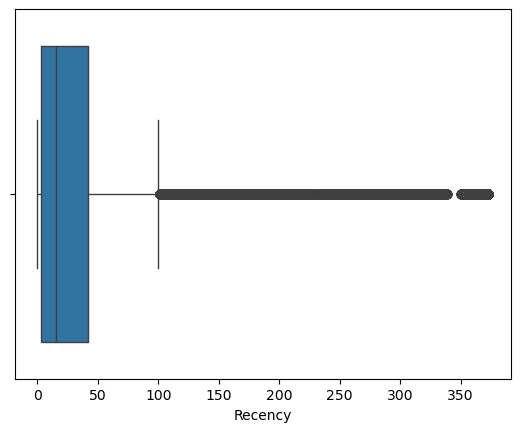

In [115]:
sns.boxplot(online_retail, x = "Recency")
plt.show()

In [117]:
## Function to calculate lower and upper whiskers
def calculate_whiskers(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [121]:
num_col = [col for col in online_retail.select_dtypes(include=['int64', 'float64']).columns if col != "CustomerSegment"]
num_col

['TotalSales', 'Year', 'Quarter', 'Recency', 'Frequency', 'MonetaryValue']

In [123]:
## Outlier Handling using winsorization
for i in num_col:
    lw, uw = calculate_whiskers(online_retail[i])
    online_retail[i] = np.where(online_retail[i] < lw, lw, online_retail[i])
    online_retail[i] = np.where(online_retail[i] > uw, uw, online_retail[i])

# FEATURE ENCODING

In [163]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
#initialize the encoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
                         
# Define the order for 'Month' and 'Days_of_Week'
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[month_order, days_order])
# Initialize LabelEncoders
label_encoder = LabelEncoder()

lbe = ["Country", "Period"]

for col in lbe:
    online_retail[col] = label_encoder.fit_transform(online_retail[col])

#apply encoding
encoded_data = ordinal_encoder.fit_transform(online_retail[["Month", "Days_of_Week"]])
#handle encoder
online_retail[["Month", "Days_of_Week"]] = online_retail[["Month", "Days_of_Week"]].ffill()
encoded_data = encoder.fit_transform(online_retail[["Month", "Days_of_Week"]].values)

#convert to string
online_retail["Month"] = online_retail["Month"].astype(str)
online_retail["Dys_of_Week"] = online_retail["Days_of_Week"].astype(str)


online_retail[["Month", "Days_of_Week"]] = ordinal_encoder.fit_transform(online_retail[["Month", "Days_of_Week"]])



In [139]:
online_retail.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,36,15.30,2010.0,4.0,December,2,Wednesday,100.5,297.0,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,36,20.34,2010.0,4.0,December,2,Wednesday,100.5,297.0,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,36,22.00,2010.0,4.0,December,2,Wednesday,100.5,297.0,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,36,20.34,2010.0,4.0,December,2,Wednesday,100.5,297.0,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,36,20.34,2010.0,4.0,December,2,Wednesday,100.5,297.0,5391.21


In [203]:
# Selecting relevant features
features = ["Recency", "Frequency", "MonetaryValue"]
clustering_features = online_retail[features]

# Standardizing the data
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Applying K-Means clustering with K=3 (since optimal K was 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
online_retail["Cluster"] = kmeans.fit_predict(clustering_features_scaled)

# Calculate mean MonetaryValue for each cluster
cluster_means = online_retail.groupby("Cluster")["MonetaryValue"].mean()

# Assign meaningful labels based on spending behavior
cluster_mapping = {
    cluster_means.idxmin(): "Low Purchase",
    cluster_means.idxmax(): "High Purchase"
}

# Assign the remaining cluster as Moderate Purchase
remaining_cluster = [c for c in cluster_means.index if c not in cluster_mapping]
if remaining_cluster:
    cluster_mapping[remaining_cluster[0]] = "Moderate Purchase"

# Map clusters to segments
online_retail["Segment"] = online_retail["Cluster"].map(cluster_mapping)

# Display sample data
online_retail.head(3)


,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,...,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Dys_of_Week,CustomerSegment,Cluster,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,36,15.30,2010.0,...,11.0,2,2.0,100.5,297.0,5391.21,Wednesday,0,2,Low Purchase
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,36,20.34,2010.0,...,11.0,2,2.0,100.5,297.0,5391.21,Wednesday,0,2,Low Purchase
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,36,22.00,2010.0,...,11.0,2,2.0,100.5,297.0,5391.21,Wednesday,0,2,Low Purchase


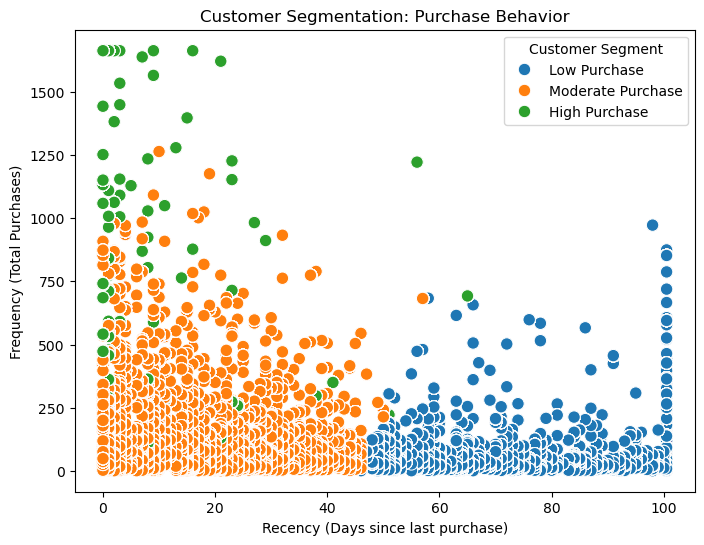

In [205]:
# 2D Scatter Plot (Recency vs Frequency)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=online_retail, x="Recency", y="Frequency", hue="Segment",s=80)
plt.title("Customer Segmentation: Purchase Behavior")
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Frequency (Total Purchases)")
plt.legend(title="Customer Segment")
plt.show()

In [212]:
online_retail["Segment"].value_counts()

Segment
Moderate Purchase    296186
Low Purchase         118620
High Purchase        108197
Name: count, dtype: int64

# SUMMARY STATISTICS

In [208]:
online_retail.describe(include=[float, int])

,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,CustomerSegment,Cluster
count,523003.000000,523003.000000,523002.000000,523002.000000,523002.000000,523003.000000,523003.000000,523003.000000,523003.000000,523003.000000,523003.000000,523003.000000,523003.000000
mean,15288.977457,34.299067,19.781659,2010.921855,2.834911,6.554358,0.633249,2.429921,29.261838,517.709279,6759.607949,1.006748,1.019929
std,1733.622259,6.158429,270.998510,0.268400,1.136667,3.508102,0.892475,1.846543,33.611410,506.349714,6750.246902,0.409978,0.658244
min,12346.000000,0.000000,0.001000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.750000,0.000000,0.000000
25%,13813.000000,36.000000,3.900000,2011.000000,2.000000,4.000000,0.000000,1.000000,3.000000,124.000000,1636.430000,1.000000,1.000000
50%,15187.000000,36.000000,9.900000,2011.000000,3.000000,7.000000,0.000000,2.000000,15.000000,328.000000,4097.370000,1.000000,1.000000
75%,16811.000000,36.000000,17.700000,2011.000000,4.000000,10.000000,2.000000,4.000000,42.000000,739.000000,9309.170000,1.000000,1.000000
max,18287.000000,38.000000,168469.600000,2011.000000,4.000000,11.000000,3.000000,6.000000,100.500000,1661.500000,20818.280000,2.000000,2.000000


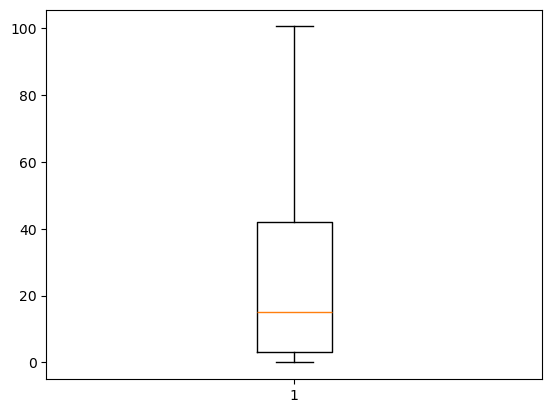

In [210]:
# plotting a boxplot to check for Outliers
plt.boxplot(clustering_features["Recency"])
plt.show()

# HANDLING IMBALANCE

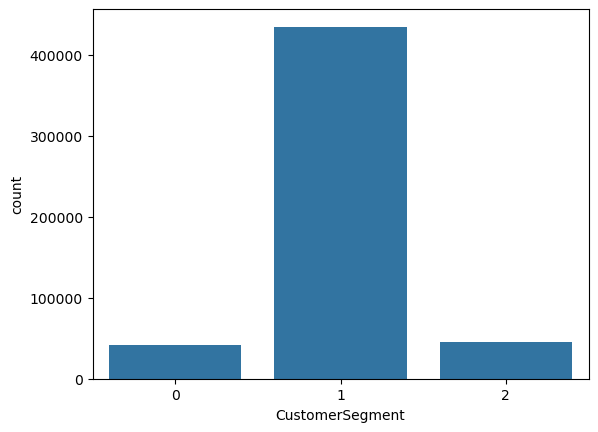

In [175]:
sns.countplot(online_retail, x = "CustomerSegment")
plt.show()

In [177]:
online_retail["CustomerSegment"].value_counts()

CustomerSegment
1    435072
2     45730
0     42201
Name: count, dtype: int64

# FEATURE SCALING

In [179]:
features = online_retail.drop("CustomerSegment", axis = 1)
target = online_retail["CustomerSegment"]

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 1)

In [187]:
online_retail.dtypes

InvoiceNo                  object
StockCode                  object
Product                    object
Quantity                   object
InvoiceDate        datetime64[ns]
UnitPrice                  object
CustomerID                  int32
Country                     int64
TotalSales                float64
Year                      float64
Quarter                   float64
Month                     float64
Period                      int64
Days_of_Week              float64
Recency                   float64
Frequency                 float64
MonetaryValue             float64
Dys_of_Week                object
CustomerSegment             int32
dtype: object

In [191]:
for col in X_train.columns:
    non_numeric_values = X_train[col][X_train[col].apply(lambda x: isinstance(x, str))]
    if not non_numeric_values.empty:
        print(f"Non-numeric values found in '{col}': {non_numeric_values.unique()}")

Non-numeric values found in 'InvoiceNo': ['557621' '539374' '550305' ... '553051' '581097' '578154']
Non-numeric values found in 'StockCode': ['84843' '22795' '47566' ... '84971l' '90075' '84031a']
Non-numeric values found in 'Product': ['WHITE SOAP RACK WITH 2 BOTTLES' 'SWEETHEART RECIPE BOOK STAND'
 'PARTY BUNTING' ... 'FOLDING SHOE TIDY' 'LARGE HEART FLOWERS HOOK   '
 'MONTANA DIAMOND CLUSTER NECKLACE']
Non-numeric values found in 'Dys_of_Week': ['Tuesday' 'Friday' 'Sunday' 'Monday' 'Thursday' 'Wednesday']


In [193]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train[col] = label_encoder.fit_transform(X_train[col])
X_test[col] = label_encoder.transform(X_test[col])

In [185]:
print(X_train.dtypes)

InvoiceNo                object
StockCode                object
Product                  object
Quantity                 object
InvoiceDate      datetime64[ns]
UnitPrice                object
CustomerID                int32
Country                   int64
TotalSales              float64
Year                    float64
Quarter                 float64
Month                   float64
Period                    int64
Days_of_Week            float64
Recency                 float64
Frequency               float64
MonetaryValue           float64
Dys_of_Week              object
dtype: object
